In [160]:
# codigo auxiliar :

# https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b

# https://mathematica.stackexchange.com/questions/110914/how-to-use-2d-fourier-analysis-to-clean-the-noise-in-an-image

# https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.io as ski

In [52]:
imagem = 'Questionario-3-Imagem-4.png'

In [53]:
im = cv2.imread(imagem, cv2.IMREAD_GRAYSCALE)  # lê a imagem em escala de cinza

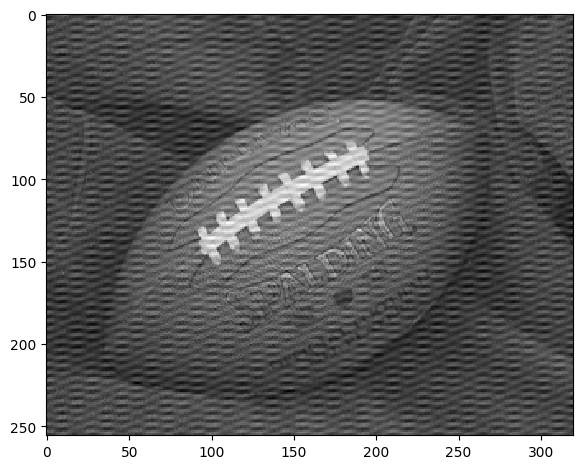

In [54]:
ski.imshow(im)

Text(0.5, 1.0, 'Espaço espectral')

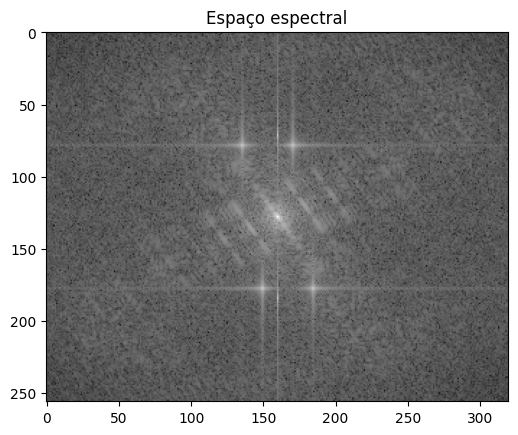

In [144]:
FFT_imagem = np.fft.fftshift(np.fft.fft2(im))  # fftshift coloca a componente zero da frequencia no centro da imagem

plt.imshow(np.log(abs(FFT_imagem)), cmap='gray')
plt.title('Espaço espectral')

C:\Users\leand\AppData\Local\Temp\ipykernel_12168\1230055786.py:21: RuntimeWarning: divide by zero encountered in log
  ax[1].imshow(np.log(abs(FFT_imagem)), cmap='gray')


Text(0.5, 1.0, 'Imagem corrigida com FFT')

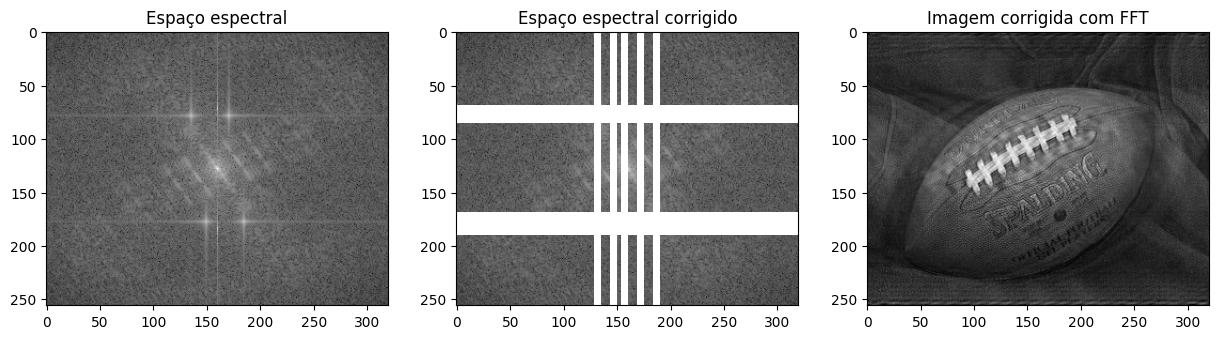

In [151]:
i = 0  # valor que irá substituir os ruídos no espaço espectral

FFT_imagem = np.fft.fftshift(np.fft.fft2(im))

# remove ruidos horizontais (ao manchar linhas verticais no espaço espectral)
FFT_imagem[:, 130:135] = i
FFT_imagem[:, 145:150] = i
FFT_imagem[:, 170:175] = i
FFT_imagem[:, 155:160] = i
FFT_imagem[:, 185:190] = i

# remove ruidos verticais (ao manchar linhas horizontais no espaço espectral)
FFT_imagem[70: 85, :] = i
FFT_imagem[170:190, :] = i

fig, ax = plt.subplots(1,3,figsize = (15,15))

ax[0].imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(im)))), cmap='gray')  
ax[0].set_title('Espaço espectral')

ax[1].imshow(np.log(abs(FFT_imagem)), cmap='gray') 
ax[1].set_title('Espaço espectral corrigido')

ax[2].imshow(abs(np.fft.ifft2(FFT_imagem)), cmap='gray')  # transformada inversa
ax[2].set_title('Imagem corrigida com FFT')

Text(0.5, 1.0, 'Imagem original')

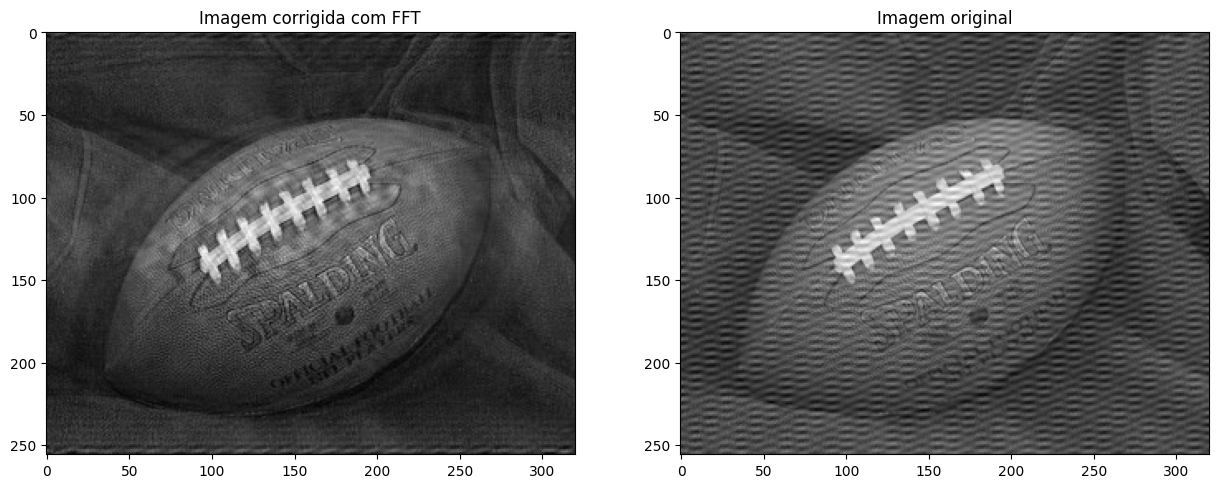

In [152]:
fig, ax = plt.subplots(1,2,figsize = (15,15))

ax[0].imshow(abs(np.fft.ifft2(FFT_imagem)), cmap='gray')
ax[0].set_title('Imagem corrigida com FFT')

ax[1].imshow(im, cmap='gray')
ax[1].set_title('Imagem original')

In [159]:
im2 = abs(np.fft.ifft2(FFT_imagem))
          
cv2.imwrite('Imagem corrigida.png', im2)

True